In [1]:
import pandas as pd

df = pd.read_csv('../../input/df_merge_last.csv')
df['date'] = pd.to_datetime(df['period'], format='%Y%m')

names = pd.Series(df.columns)
text = ['tokens'] + list(names[names.str.contains('stock')])
hist_ons = ['past_bestpc_6', 'past_bestpc_12', 'past_bestpc_60', 'past_bestpc_120', 'population', 'since_anyviolence', 
            'since_armedconf', 'since_civilwar', 'ongoing_anyviolence', 'ongoing_armedconf', 'ongoing_civilwar', 'discounted_anyviolence', 
            'discounted_armedconf', 'discounted_best','neighbors_anyviolence', 'neighbors_armedconf', 'neighbors_best']
hist_int = ['best', 'lnbest'] + hist_ons

target = "int_lnbest_12"
features = [*text, 'int_lnbest_12_naive', *hist_int]
ids = ['isocode', 'date']
df = df[ids + [target] + features]
print("Number of units: ", df["isocode"].nunique())
df

Number of units:  192


,isocode,date,int_lnbest_12,tokens,stock_tokens,stock_topic_0,stock_topic_1,stock_topic_2,stock_topic_3,stock_topic_4,...,since_civilwar,ongoing_anyviolence,ongoing_armedconf,ongoing_civilwar,discounted_anyviolence,discounted_armedconf,discounted_best,neighbors_anyviolence,neighbors_armedconf,neighbors_best
0,AFG,1989-01-01,8.460199,21749.0,21749.000000,0.005289,0.049050,0.218680,0.019465,0.063703,...,0,1,1,1,0.050000,0.050000,35.700000,0.016667,0.000000,0.050000
1,AFG,1989-02-01,8.437500,39265.0,56664.200000,0.004632,0.037740,0.202988,0.026511,0.069315,...,1,2,2,0,0.097500,0.097500,41.915000,0.015833,0.000000,0.047500
2,AFG,1989-03-01,8.013674,25307.0,70638.360000,0.004819,0.031620,0.221598,0.023642,0.073523,...,0,3,3,1,0.142625,0.142625,127.019250,0.031708,0.000000,0.528458
3,AFG,1989-04-01,8.012018,20535.0,77045.688000,0.005170,0.028290,0.230308,0.021848,0.074866,...,0,4,4,2,0.185494,0.185494,145.368287,0.046790,0.000000,0.918702
4,AFG,1989-05-01,7.852050,10910.0,72546.550400,0.004856,0.027064,0.232053,0.022240,0.076722,...,0,5,5,3,0.226219,0.226219,160.799873,0.061117,0.000000,0.939434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83353,ZWE,2025-01-01,NaN,627.0,4919.874256,0.140106,0.102919,0.020779,0.060246,0.007975,...,433,0,0,0,0.009629,0.000007,0.022933,0.394357,0.194331,14.007982
83354,ZWE,2025-02-01,NaN,861.0,4796.899405,0.123200,0.114680,0.027588,0.059036,0.007285,...,434,0,0,0,0.009147,0.000007,0.021786,0.399640,0.209614,14.632583
83355,ZWE,2025-03-01,NaN,810.0,4647.519524,0.119896,0.122565,0.028176,0.064372,0.007202,...,435,0,0,0,0.008690,0.000007,0.020697,0.404658,0.224134,14.888453
83356,ZWE,2025-04-01,NaN,1330.0,5048.015619,0.171411,0.104685,0.022773,0.052974,0.006789,...,436,0,0,0,0.008256,0.000006,0.019662,0.409425,0.225427,14.819031


In [2]:
zero_or_nan_countries = (
    df.groupby("isocode")["int_lnbest_12"]
    .apply(lambda x: ((x == 0) | (x.isna())).all())
    .loc[lambda x: x]
    .index.tolist()
)

print("Countries with only zeros target:", zero_or_nan_countries)
print("Total number: ", len(zero_or_nan_countries))

Countries with only zeros target: ['BGR', 'BHS', 'BLR', 'BMU', 'BRN', 'CHE', 'CHL', 'CPV', 'CUB', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FJI', 'GAB', 'GNQ', 'GRD', 'HKG', 'HUN', 'IRL', 'ISL', 'ITA', 'JPN', 'KAZ', 'KIR', 'KNA', 'KOR', 'LCA', 'LTU', 'LUX', 'LVA', 'MAC', 'MDV', 'MHL', 'MLT', 'MNG', 'MUS', 'NOR', 'NZL', 'PLW', 'PRI', 'PRK', 'PRT', 'QAT', 'SGP', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SYC', 'TKM', 'TON', 'URY', 'VCT', 'VNM', 'VUT', 'WSM', 'XKX']
Total number:  60


In [3]:
df = df[~df["isocode"].isin(zero_or_nan_countries)]
df.reset_index(drop=True, inplace=True)
print("After removing countries with only zeros target, number of units: ", df["isocode"].nunique())
df

After removing countries with only zeros target, number of units:  132


,isocode,date,int_lnbest_12,tokens,stock_tokens,stock_topic_0,stock_topic_1,stock_topic_2,stock_topic_3,stock_topic_4,...,since_civilwar,ongoing_anyviolence,ongoing_armedconf,ongoing_civilwar,discounted_anyviolence,discounted_armedconf,discounted_best,neighbors_anyviolence,neighbors_armedconf,neighbors_best
0,AFG,1989-01-01,8.460199,21749.0,21749.000000,0.005289,0.049050,0.218680,0.019465,0.063703,...,0,1,1,1,0.050000,0.050000,35.700000,0.016667,0.000000,0.050000
1,AFG,1989-02-01,8.437500,39265.0,56664.200000,0.004632,0.037740,0.202988,0.026511,0.069315,...,1,2,2,0,0.097500,0.097500,41.915000,0.015833,0.000000,0.047500
2,AFG,1989-03-01,8.013674,25307.0,70638.360000,0.004819,0.031620,0.221598,0.023642,0.073523,...,0,3,3,1,0.142625,0.142625,127.019250,0.031708,0.000000,0.528458
3,AFG,1989-04-01,8.012018,20535.0,77045.688000,0.005170,0.028290,0.230308,0.021848,0.074866,...,0,4,4,2,0.185494,0.185494,145.368287,0.046790,0.000000,0.918702
4,AFG,1989-05-01,7.852050,10910.0,72546.550400,0.004856,0.027064,0.232053,0.022240,0.076722,...,0,5,5,3,0.226219,0.226219,160.799873,0.061117,0.000000,0.939434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57409,ZWE,2025-01-01,NaN,627.0,4919.874256,0.140106,0.102919,0.020779,0.060246,0.007975,...,433,0,0,0,0.009629,0.000007,0.022933,0.394357,0.194331,14.007982
57410,ZWE,2025-02-01,NaN,861.0,4796.899405,0.123200,0.114680,0.027588,0.059036,0.007285,...,434,0,0,0,0.009147,0.000007,0.021786,0.399640,0.209614,14.632583
57411,ZWE,2025-03-01,NaN,810.0,4647.519524,0.119896,0.122565,0.028176,0.064372,0.007202,...,435,0,0,0,0.008690,0.000007,0.020697,0.404658,0.224134,14.888453
57412,ZWE,2025-04-01,NaN,1330.0,5048.015619,0.171411,0.104685,0.022773,0.052974,0.006789,...,436,0,0,0,0.008256,0.000006,0.019662,0.409425,0.225427,14.819031


<Axes: xlabel='date'>

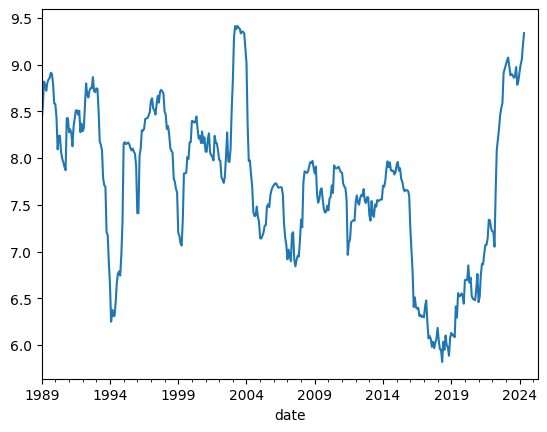

In [4]:
isocode = 'SDN'
df_proof = df[df['isocode'] == isocode].copy()
df_proof.index = df_proof['date']
df_proof["int_lnbest_12"].plot()

In [4]:
isocode_list = ["SDN"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import pandas as pd
from OptimalPanel.optimizer import OptimalBundleRL

for isocode in isocode_list:
    
    # --- Configuration ---
    unit_col = 'isocode'
    time_col = 'date'
    target_col = 'int_lnbest_12'
    target_unit = isocode
    feature_cols = df.columns.difference([unit_col, time_col, target_col])
    forecast_times = list(pd.date_range(start="2018-01-01", end="2024-05-01", freq="MS"))
    total_epochs = 10
    rf_params = {
            "random_state": 428842, 
            "criterion": 'squared_error',
            "min_samples_split": 2, 
            "n_estimators": 300, 
            "max_depth": 7,
            "max_features": 0.24, 
            "min_samples_leaf": 10, 
            "n_jobs": -1
        }

    # --- Cutoff for similarity training ---
    train_cutoff = pd.to_datetime("2010-12-31")
    test_start = pd.to_datetime("2011-01-01")
    test_end = pd.to_datetime("2017-12-31")

    # --- Target test set ---
    target_test_df = df[(df[unit_col] == target_unit) & (df[time_col].between(test_start, test_end))]
    X_target_test = target_test_df[feature_cols]
    y_target_test = target_test_df[target_col]

    # --- Train models for each country and compute similarity ---
    country_rmse = {}

    for iso in df[unit_col].unique():
        train_df = df[(df[unit_col] == iso) & (df[time_col] <= train_cutoff)]
        if len(train_df) < 5 or len(X_target_test) == 0:
            continue
        
        X_train = train_df[feature_cols]
        y_train = train_df[target_col]

        model = RandomForestRegressor(random_state = 428842, criterion = 'squared_error',
                                      min_samples_split = 2, n_estimators = 300, max_depth=7,
                                      max_features = 0.24, min_samples_leaf=10, n_jobs= -1)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_target_test)
        rmse = sqrt(mean_squared_error(y_target_test, y_pred))
        country_rmse[iso] = rmse

    if len(country_rmse) < 5:
        print(f"⚠️ Skipping {target_unit} — insufficient valid donors")
        continue

    # --- Convert to similarity ---
    similarity_rmse_df = pd.DataFrame.from_dict(country_rmse, orient='index', columns=['RMSE'])
    similarity_rmse_df = similarity_rmse_df.sort_values(by='RMSE')

    donor_isos = similarity_rmse_df.index.drop(target_unit, errors='ignore').tolist()
    similarity_scores = 1 / (1 + similarity_rmse_df.loc[donor_isos, 'RMSE'].values)
    sim_tensor = torch.tensor(similarity_scores, dtype=torch.float32)

    print(f"\n🔍 Target: {target_unit} — Top donor scores:")
    for iso, score in zip(donor_isos[:10], similarity_scores[:10]):
        print(f"  {iso}: {score:.4f}")  

    # --- RL Optimization ---
    rl = OptimalBundleRL(
        df=df,
        unit_col=unit_col,
        time_col=time_col,
        target_col=target_col,
        feature_cols=feature_cols,
        target_unit=target_unit,
        donor_units=donor_isos,
        similarities=sim_tensor,
        forecast_times=forecast_times
    )

    rl.train(
        n_epochs=total_epochs,
        rf_params=rf_params,
        save=False,
        save_path=f"results/results_{target_unit}.pkl"
    )

## Interpret

In [6]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def load_results_and_plot(results_dir="results/", top_n_donors=20, save=False, directory="results"):
    benchmark_data = []

    for filename in os.listdir(results_dir):
        if filename.endswith(".pkl") and filename.startswith("results_"):
            filepath = os.path.join(results_dir, filename)
            with open(filepath, "rb") as f:
                results = pickle.load(f)

            target_unit = results["target_unit"]
            print(f"📦 Loaded {filename}")

            # --- Plot learning curve ---
            plt.figure()
            plt.plot(results["avg_mse_per_epoch"], label="RL MSE")
            plt.xlabel("Epoch")
            plt.ylabel("MSE")
            plt.title(f"Learning Curve: {target_unit}")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            if save:
                iso_path = f"{directory}/{target_unit}_learning_curve.pdf"
                plt.savefig(iso_path, format="pdf", bbox_inches="tight", dpi=300)
                print(f"✅ Plot saved to {iso_path}")
            plt.show()

            # --- Plot donor inclusion probabilities ---
            final_scores = {
                iso: probs[-1]
                for iso, probs in results["inclusion_probs_by_donor"].items()
                if len(probs) > 0
            }
            top_donors = sorted(final_scores.items(), key=lambda x: -x[1])[:top_n_donors]

            plt.figure()
            for iso, _ in top_donors:
                plt.plot(results["inclusion_probs_by_donor"][iso], label=iso)

            plt.xlabel("Epoch")
            plt.ylabel("Inclusion Probability")
            plt.title(f"Top {top_n_donors} Donor Inclusion Probs — {target_unit}")
            plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
            plt.grid(True)
            plt.tight_layout()
            if save:
                iso_path = f"{directory}/{target_unit}_donors_probabilities.pdf"
                plt.savefig(iso_path, format="pdf", bbox_inches="tight", dpi=300)
                print(f"✅ Plot saved to {iso_path}")
            plt.show()

            # --- Collect benchmark results ---
            benchmarks = results.get("benchmarks", {})
            if benchmarks:
                benchmark_data.append({
                    "country": target_unit,
                    "AR(1)": benchmarks.get("ar1_mse", None),
                    "Solo RF": benchmarks.get("solo_rf_mse", None),
                    "Full Panel RF": benchmarks.get("full_panel_rf_mse", None),
                    "Best Bundle RF": benchmarks.get("best_bundle_rf_mse", None),
                })

    return pd.DataFrame(benchmark_data)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_benchmark_summary(benchmark_df, save=False, save_path="benchmark_summary.pdf"):
    if benchmark_df.empty:
        print("No benchmark data to plot.")
        return

    # Normalize by AR(1) MSE for each country
    df_relative = benchmark_df.copy()
    for idx, row in df_relative.iterrows():
        ar1_mse = row["AR(1)"]
        if ar1_mse == 0:
            continue  # avoid division by zero
        for col in df_relative.columns:
            if col != "country":
                df_relative.at[idx, col] = row[col] / ar1_mse
        df_relative.at[idx, "AR(1)"] = 1.0  # set AR(1) to baseline

    # Melt for long format
    df_melted = df_relative.melt(id_vars="country", var_name="Method", value_name="Relative MSE")

    plt.figure(figsize=(14, 6))
    for method in df_melted["Method"].unique():
        subset = df_melted[df_melted["Method"] == method]
        plt.plot(subset["country"], subset["Relative MSE"], marker="o", label=method)

    plt.xticks(rotation=90)
    plt.ylabel("Relative MSE")
    plt.title("Benchmark Comparison Across Countries")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(save_path, format="pdf", bbox_inches="tight", dpi=300)
        print(f"✅ Plot saved to {save_path}")
    plt.show()

def plot_benchmark_boxplot(benchmark_df, save=False, save_path="benchmark_boxplot.pdf"):
    if benchmark_df.empty:
        print("No benchmark data to plot.")
        return

    # Normalize by AR(1) MSE for each country
    df_relative = benchmark_df.copy()
    for idx, row in df_relative.iterrows():
        ar1_mse = row["AR(1)"]
        if ar1_mse == 0:
            continue  # avoid division by zero
        for col in df_relative.columns:
            if col != "country":
                df_relative.at[idx, col] = row[col] / ar1_mse
        df_relative.at[idx, "AR(1)"] = 1.0  # set AR(1) to baseline

    # Melt for long format
    df_melted = df_relative.melt(id_vars="country", var_name="Method", value_name="Relative MSE")

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melted, x="Method", y="Relative MSE", palette="Set2")
    plt.ylabel("Relative MSE")
    plt.title("Distribution of Relative MSE by Method")
    plt.grid(True, axis='y')

    if save:
        plt.savefig(save_path, format="pdf", bbox_inches="tight", dpi=300)
        print(f"✅ Boxplot saved to {save_path}")
    plt.show()

📦 Loaded results_FRA.pkl
✅ Plot saved to results/FRA_learning_curve.pdf


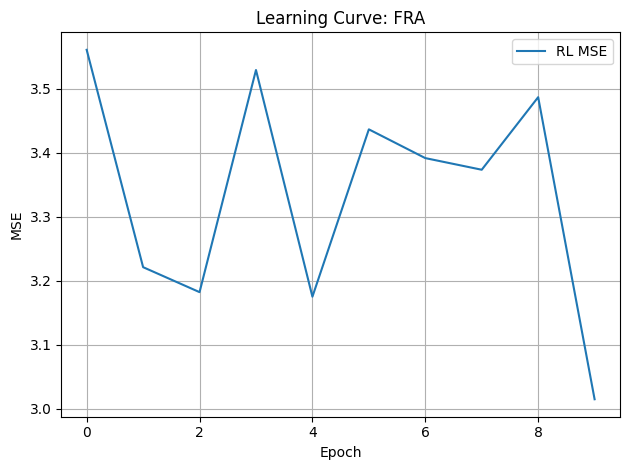

✅ Plot saved to results/FRA_donors_probabilities.pdf


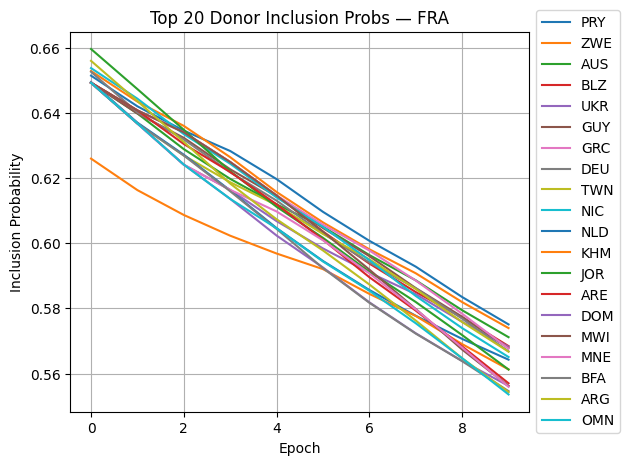

📦 Loaded results_SDN.pkl
✅ Plot saved to results/SDN_learning_curve.pdf


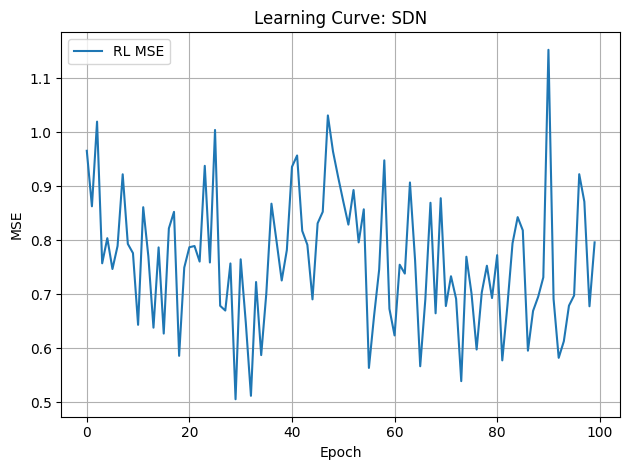

✅ Plot saved to results/SDN_donors_probabilities.pdf


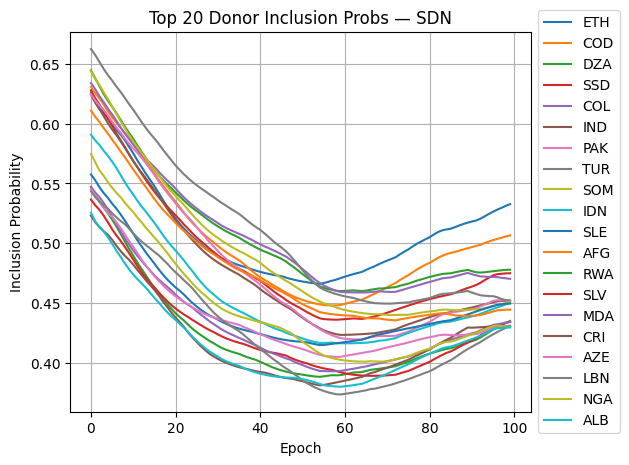

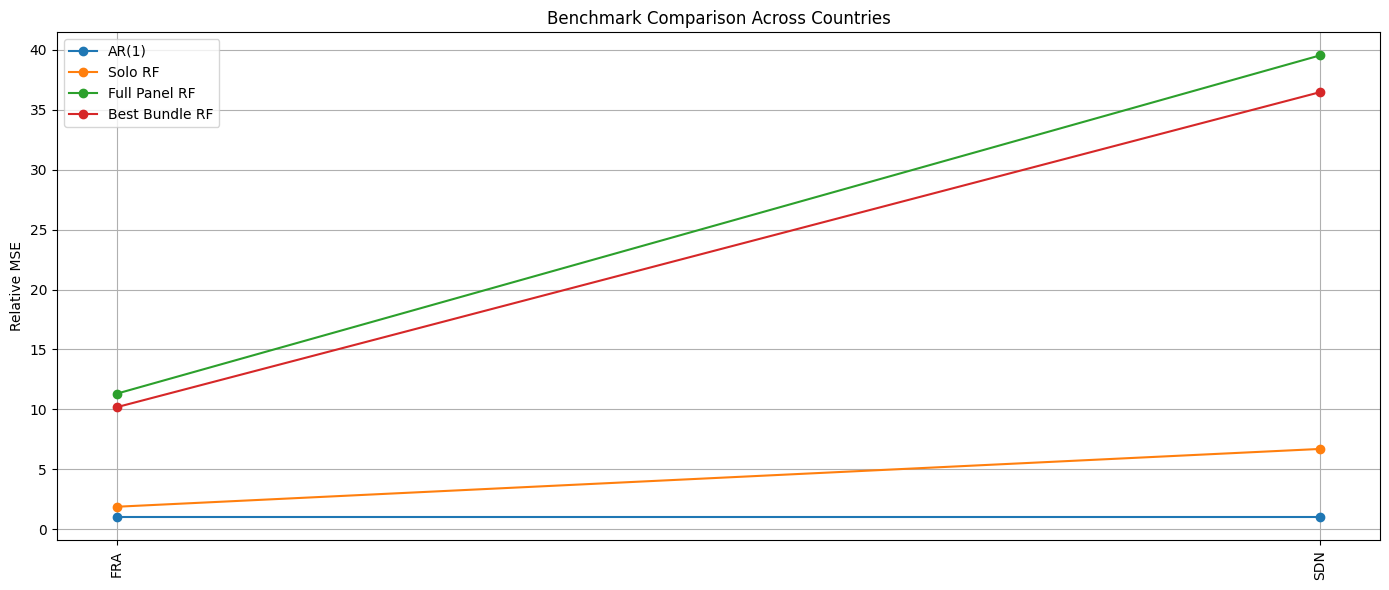

/tmp/ipykernel_844817/3271822040.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Method", y="Relative MSE", palette="Set2")


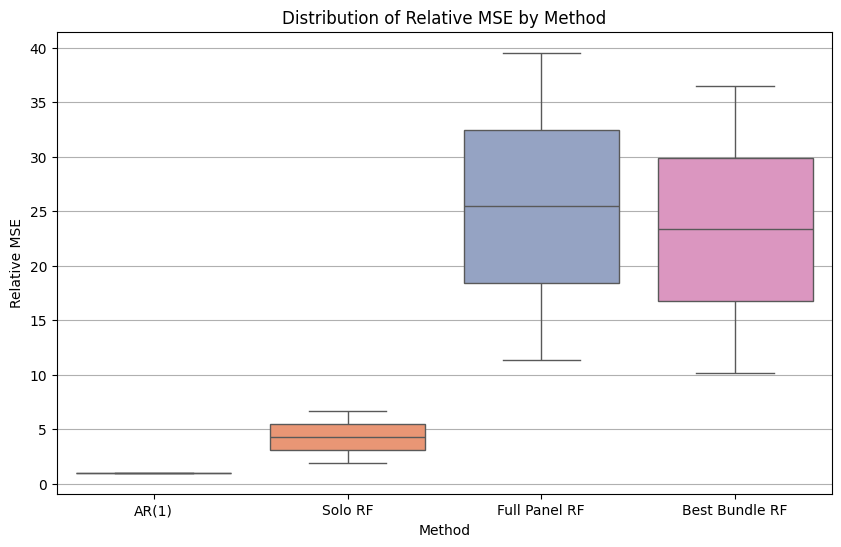

In [10]:
benchmark_df = load_results_and_plot(results_dir="results", top_n_donors=20, save=True, directory="results")
plot_benchmark_summary(benchmark_df, save=False, save_path="results/annual/figures/summary_plot.pdf")
plot_benchmark_boxplot(benchmark_df, save=False, save_path="results/annual/figures/mse_boxplot.pdf")

In [2]:
# open
import pandas as pd
results_sdn = pd.read_pickle("results/results_SDN.pkl")
results_sdn

{'avg_mse_per_epoch': [np.float64(0.9658861241523718),
  np.float64(0.8629700835121876),
  np.float64(1.0199397090961966),
  np.float64(0.7573334199159718),
  np.float64(0.8039253122730003),
  np.float64(0.7467266095531294),
  np.float64(0.7894316678982646),
  np.float64(0.9223188659292273),
  np.float64(0.7932760437379973),
  np.float64(0.7762297539446004),
  np.float64(0.643253456029096),
  np.float64(0.8613085991583481),
  np.float64(0.7703169226412736),
  np.float64(0.6379963736523754),
  np.float64(0.786818706856424),
  np.float64(0.6270521092778314),
  np.float64(0.821995928983963),
  np.float64(0.8526614440087213),
  np.float64(0.5857762082123916),
  np.float64(0.749331631696071),
  np.float64(0.7871288118341174),
  np.float64(0.7893249595200903),
  np.float64(0.760490053677721),
  np.float64(0.9380141297333274),
  np.float64(0.7588182084902731),
  np.float64(1.0044915897332591),
  np.float64(0.6785340140934544),
  np.float64(0.6697512083338549),
  np.float64(0.75703274718857),


In [3]:
results_sdn["benchmarks"]

{'ar1_mse': np.float64(0.02227482911477131),
 'solo_rf_mse': np.float64(0.14929764004167292),
 'full_panel_rf_mse': np.float64(0.8804996506083156),
 'best_bundle_rf_mse': np.float64(0.8121411523011902)}

In [4]:
results_fra = pd.read_pickle("results/results_FRA.pkl")
results_fra["benchmarks"]

{'ar1_mse': np.float64(0.2957998041282897),
 'solo_rf_mse': np.float64(0.5568490262656323),
 'full_panel_rf_mse': np.float64(3.3485918628793887),
 'best_bundle_rf_mse': np.float64(3.014868665732027)}